In [ ]:
# ============= PREAMBLE =============
# Last Edited By: Luca Carnegie 
# Date: March 29, 2025
# Description: Creates 2 Cox proportional hazards models to predict flowering date based on temperature based on both datasets
#                   - One model using just historical data (essentially just Aono et al.'s data)
#                   - One model using historical/modern data (combining Aono et al.'s data with modern data)
# =====================================

from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
import pandas as pd
import numpy as np
from ISLP.models import ModelSpec as MS
from ISLP import load_data
from pickle import loads, dumps
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test 
from lifelines.utils import survival_table_from_events

import numpy as np


# Load the data
sakura_historic = pd.read_csv("../data/analysis_data/historic_bloom.csv")
sakura_historic_modern = pd.read_csv("../data/analysis_data/merged_historic_modern_bloom.csv")

# Make all rows with NaN values 0
sakura_historic = sakura_historic.replace({np.nan: 0})
sakura_historic_modern = sakura_historic_modern.replace({0})

C:\Users\lucac\AppData\Local\Temp\ipykernel_24272\190143991.py:23: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  sakura_historic_modern = sakura_historic_modern.replace({0})


C:\Users\lucac\AppData\Local\Temp\ipykernel_24272\2595694751.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['avg_temp_march_c_std'] = (selected_df['avg_temp_march_c'] - temp_mean) / temp_std


<lifelines.CoxPHFitter: fitted with 1204 total observations, 827 right-censored observations>
             duration col = 'flower_doy'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 1204
number of events observed = 377
   partial log-likelihood = -1888.25
         time fit was run = 2025-03-30 01:53:11 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
avg_temp_march_c         0.01      1.01      0.08           -0.14            0.16                0.87                1.17
avg_temp_march_c_X_time -0.12      0.88      8.24          -16.27           16.02                0.00            9.09e+06

                         cmp to     z    p  -log2(p)
covariate                                           
avg_temp_march_c           0.00  0.12 0.91      0.14
avg_temp_march_c_X_time    0.00 -0.01 0.99      0.02
---
Concordance = 1.00
Partial AIC = 3780.50
log-likelihood ratio test = 1439.55 on 2 df
-log2(p) of ll-ratio test = inf


   Bootstrapping lowess lines. May take a moment...



c:\Users\lucac\AppData\Local\Programs\Python\Python313\Lib\site-packages\lifelines\utils\lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.27914e-17): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1204 total observations, 827 right-censored observations>
         test_name = proportional_hazard_test

---
                              test_statistic      p  -log2(p)
avg_temp_march_c        km              0.00   1.00      0.00
                        rank           11.68 <0.005     10.63
avg_temp_march_c_X_time km              0.00   1.00      0.00
                        rank            0.00   1.00      0.00



1. Variable 'avg_temp_march_c' failed the non-proportional test: p-value is 0.0006.

   Advice 1: the functional form of the variable 'avg_temp_march_c' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'avg_temp_march_c' using pd.cut, and then specify it in
`strata=['avg_temp_march_c', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...



c:\Users\lucac\AppData\Local\Programs\Python\Python313\Lib\site-packages\lifelines\utils\lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.27914e-17): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)



---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<Axes: xlabel='rank-transformed time\n(p=0.0006)'>,
  <Axes: xlabel='km-transformed time\n(p=1.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9998)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9992)'>]]

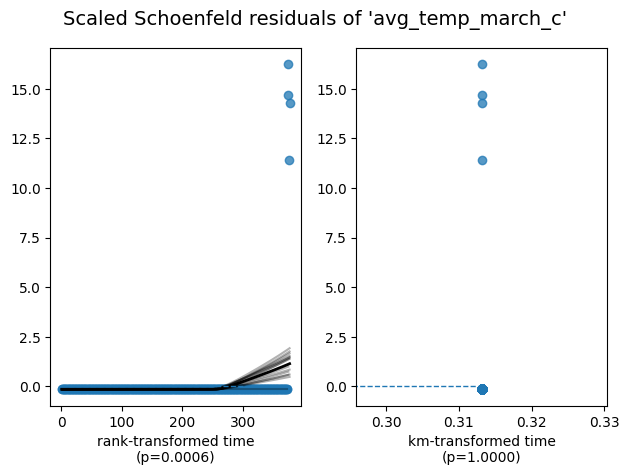

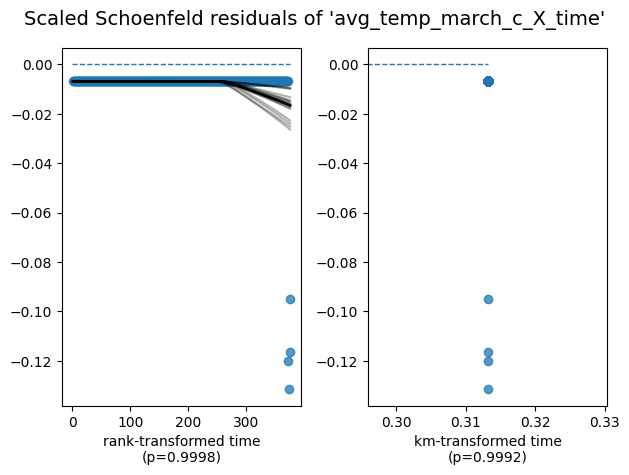

In [34]:
## FIT THE MODEL USING JUST HISTORICAL DATA ## 

# Create a Cox proportional hazards model object
coxph = CoxPHFitter

# Create a subset of data with relevant features
selected_df = sakura_historic[['flower_doy', 'censored', 'avg_temp_march_c']]

# Add an interaction term (temperature × time)
# First, standardize temperature to make interpretation easier
temp_mean = selected_df['avg_temp_march_c'].mean()
temp_std = selected_df['avg_temp_march_c'].std()
selected_df['avg_temp_march_c_std'] = (selected_df['avg_temp_march_c'] - temp_mean) / temp_std
                     
# Create model dataframe with transformed features
model_df = MS(['flower_doy', 'censored', 'avg_temp_march_c'], 
              intercept=False).fit_transform(selected_df)

# Create time interaction term
model_df['avg_temp_march_c_X_time'] = model_df['avg_temp_march_c'] * model_df['flower_doy']

# Fit the Cox model
cox_sakura_0 = coxph().fit(model_df,  # Use the transformed model matrix
                           duration_col='flower_doy',
                           event_col='censored')

# Display summary statistics
cox_sakura_0.print_summary()
cox_sakura_0.check_assumptions(model_df, p_value_threshold=0.05, show_plots=True)

### Assumptions of Cox Proportional Hazards Model to be Tested


   Bootstrapping lowess lines. May take a moment...



c:\Users\lucac\AppData\Local\Programs\Python\Python313\Lib\site-packages\lifelines\utils\lowess.py:54: LinAlgWarning: Ill-conditioned matrix (rcond=3.27914e-17): result may not be accurate.
  beta = linalg.solve(A, b, assume_a="pos", check_finite=False)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1204 total observations, 827 right-censored observations>
         test_name = proportional_hazard_test

---
                       test_statistic      p  -log2(p)
avg_temp_march_c km              0.00   1.00      0.00
                 rank           25.07 <0.005     20.79



1. Variable 'avg_temp_march_c' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'avg_temp_march_c' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'avg_temp_march_c' using pd.cut, and then specify it in
`strata=['avg_temp_march_c', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proporti

[[<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=1.0000)'>]]

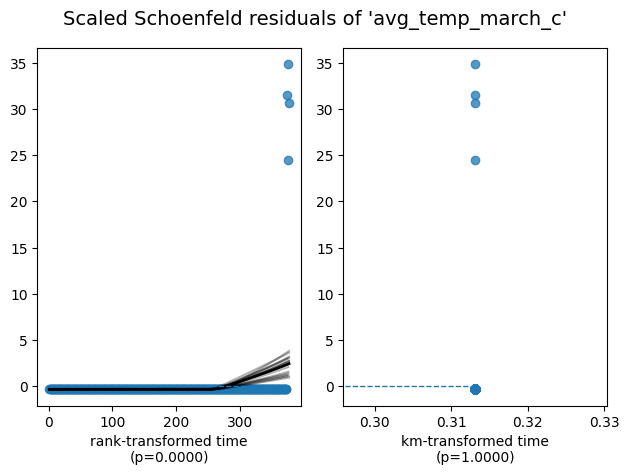

In [ ]:
# Check the proportional hazards assumption
